In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels sqlite-utils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import statsmodels.api as sm
import scipy.stats as stats


In [7]:
df = pd.read_csv("2015.csv")
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [8]:
df.info()
df.describe()
df.isnull().sum().head(20)   # see missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


,0
_STATE,0
FMONTH,0
IDATE,0
IMONTH,0
IDAY,0
IYEAR,0
DISPCODE,0
SEQNO,0
_PSU,0
CTELENUM,186811


In [10]:
# Drop duplicates
df = df.drop_duplicates()

if 'bmi' in df.columns:
    df['bmi'].fillna(df['bmi'].median(), inplace=True)


if 'county' in df.columns:
    df['county'] = df['county'].astype(str).str.title()

print("Data cleaned successfully.")


Data cleaned successfully.


In [13]:
df.columns


Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [14]:
df['_STATE'].unique()[:10]


array([ 1.,  2.,  4.,  5.,  6.,  8.,  9., 10., 11., 12.])

In [15]:
query = """
SELECT _STATE AS state_code,
       AVG(_BMI5) AS avg_bmi,
       COUNT(*) AS sample_size
FROM public_health
GROUP BY _STATE
ORDER BY avg_bmi DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,state_code,avg_bmi,sample_size
0,20.0,3035.409173,23236
1,22.0,2894.351295,4716
2,54.0,2885.181685,5957
3,28.0,2883.640537,6035
4,21.0,2881.633087,8806
5,1.0,2874.071245,7950
6,40.0,2861.689005,6943
7,29.0,2861.364725,7307
8,5.0,2856.961562,5256
9,47.0,2856.814977,5979


In [16]:
df.groupby("_STATE")["_BMI5"].mean().sort_values(ascending=False).head(10)


,_BMI5
_STATE,
20.0,3035.409173
22.0,2894.351295
54.0,2885.181685
28.0,2883.640537
21.0,2881.633087
1.0,2874.071245
40.0,2861.689005
29.0,2861.364725
5.0,2856.961562


In [17]:
query = """
SELECT _STATE AS state_code,
       AVG(_FLSHOT6) AS flu_shot_rate,
       COUNT(*) AS sample_size
FROM public_health
GROUP BY _STATE
ORDER BY flu_shot_rate DESC
LIMIT 10;
"""
pd.read_sql(query, conn)


,state_code,flu_shot_rate,sample_size
0,11.0,2.770971,3994
1,25.0,2.769855,9294
2,8.0,2.652423,13537
3,6.0,2.613855,12601
4,55.0,2.568848,6188
5,4.0,2.567273,7946
6,24.0,2.548491,12598
7,36.0,2.534418,12357
8,44.0,2.519731,6206
9,9.0,2.503128,11899


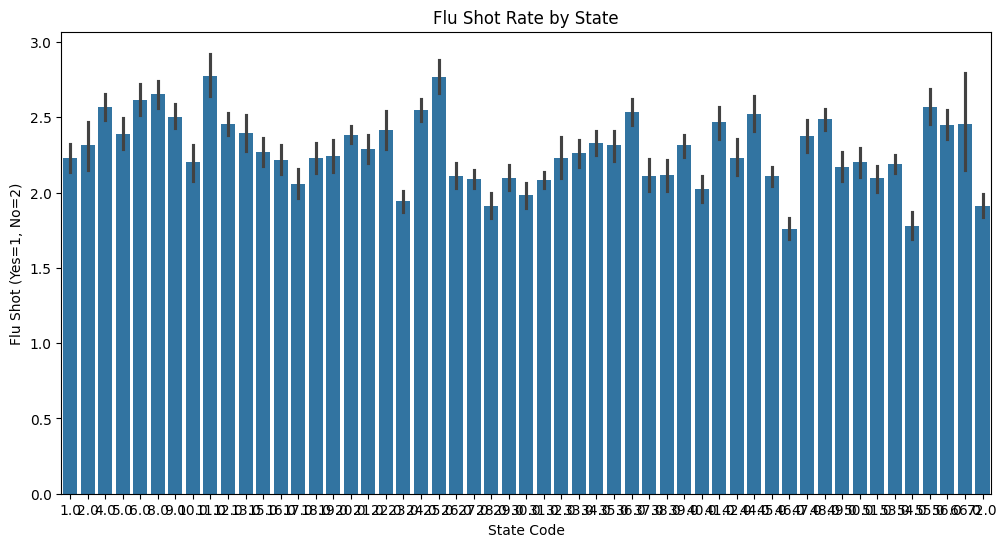

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x="_STATE", y="_FLSHOT6", data=df)
plt.title("Flu Shot Rate by State")
plt.xlabel("State Code")
plt.ylabel("Flu Shot (Yes=1, No=2)")
plt.show()


In [20]:
df.to_csv("processed_public_health.csv", index=False)

from google.colab import files
files.download("processed_public_health.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>